In [22]:
#https://keras.io/api/applications/

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
#example for Basic implementation from Keras Documentation

In [64]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.7 MB/s eta 0:00:00


In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 0s 0us/step


In [66]:
from keras_preprocessing.image.utils import img_to_array
from keras.utils import load_img

In [7]:
pwd

'/content'

In [9]:
img_path = '/content/whale.jpeg'

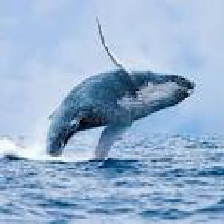

In [10]:
image.load_img(img_path,target_size=(224,224))

In [11]:
img= image.load_img(img_path,target_size=(224,224))

In [12]:
x= image.img_to_array(img)

In [13]:
x= np.expand_dims(x, axis=0)

In [14]:
x.shape

(1, 224, 224, 3)

In [15]:
x = preprocess_input(x)

In [16]:
preds =model.predict(x)

1/1 [==============================] - 9s 9s/step


In [17]:
preds.shape

(1, 1000)

In [18]:
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02066245', 'grey_whale', 0.91769654), ('n02074367', 'dugong', 0.028867118), ('n01484850', 'great_white_shark', 0.026992595)]


In [19]:
decode_predictions(preds, top=3)[0]

[('n02066245', 'grey_whale', 0.91769654),
 ('n02074367', 'dugong', 0.028867118),
 ('n01484850', 'great_white_shark', 0.026992595)]

**Extract features from last layers of a model - include_top=False**

In [22]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False) 

img_path = '/content/whale.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)



1/1 [==============================] - 1s 898ms/step


In [23]:
features.shape

(1, 7, 7, 512)

**Extract features from an arbitrary intermediate layer with VGG19**

In [24]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/whale.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

1/1 [==============================] - 0s 118ms/step


In [25]:
block4_pool_features.shape

(1, 14, 14, 512)

In [48]:
#CUSTOM

In [26]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [27]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]



In [28]:
train_path = '/content/drive/MyDrive/skin_disease/train'
valid_path = '/content/drive/MyDrive/skin_disease/val'

In [29]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [30]:
for layer in vgg.layers:
  layer.trainable = False

In [31]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/skin_disease/train/*')
len(folders)

5

In [32]:
folders

['/content/drive/MyDrive/skin_disease/train/bug bite',
 '/content/drive/MyDrive/skin_disease/train/white spots',
 '/content/drive/MyDrive/skin_disease/train/normal',
 '/content/drive/MyDrive/skin_disease/train/eczema',
 '/content/drive/MyDrive/skin_disease/train/allergies']

In [33]:
class_names= [ "allergies","bug_bite","eczema","normal","white_spots"]

In [34]:
x = Flatten()(vgg.output)

In [35]:
x.shape

TensorShape([None, 25088])

In [36]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)

In [37]:
prediction.shape

TensorShape([None, 5])

In [38]:
model = Model(inputs=vgg.input, outputs=prediction)

In [39]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [193]:
# tell the model what cost and optimization method to use
from tensorflow.keras.optimizers import SGD

In [212]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']
)


In [58]:
from keras.preprocessing.image import ImageDataGenerator

In [60]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00


In [61]:
from keras_preprocessing.image.utils import img_to_array
from keras.utils import load_img

In [228]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.7,
                                   zoom_range = 0.7,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [229]:


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 132,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 132,
                                            class_mode = 'categorical')

Found 120 images belonging to 5 classes.
Found 64 images belonging to 5 classes.


In [205]:
next(training_set)[0].shape

(120, 224, 224, 3)

In [45]:
list(next(training_set)[1][0])

[0.0, 1.0, 0.0, 0.0, 0.0]

In [46]:
list(next(training_set)[1][0]).index(1.0)

1

In [230]:
print_images=next(training_set)[0]

In [48]:
print_images[0].shape

(224, 224, 3)

In [231]:
print_images=next(training_set)[0]
len(print_images)

120

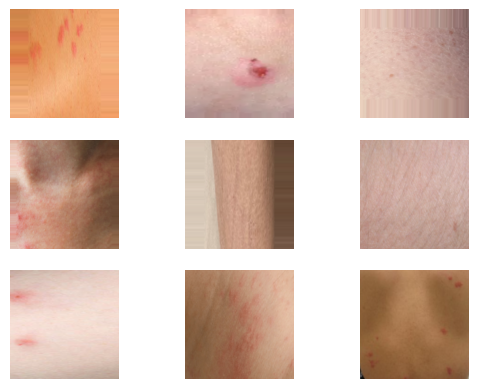

In [232]:
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    
    plt.imshow(print_images[i])
    plt.axis("off")

In [209]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [52]:
len(training_set)

4

In [53]:
len(training_set)

4

In [233]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=500,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-233-86110095c1ab>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/500
1/1 [==============================] - 12s 12s/step - loss: 0.6258 - accuracy: 0.8833 - val_loss: 3.0761 - val_accuracy: 0.5938
Epoch 2/500
1/1 [==============================] - 4s 4s/step - loss: 0.5394 - accuracy: 0.8583 - val_loss: 3.0875 - val_accuracy: 0.5781
Epoch 3/500
1/1 [==============================] - 3s 3s/step - loss: 0.3097 - accuracy: 0.9083 - val_loss: 3.0270 - val_accuracy: 0.5938
Epoch 4/500
1/1 [==============================] - 3s 3s/step - loss: 0.5146 - accuracy: 0.8083 - val_loss: 2.9997 - val_accuracy: 0.5938
Epoch 5/500
1/1 [==============================] - 5s 5s/step - loss: 0.5654 - accuracy: 0.8000 - val_loss: 2.9532 - val_accuracy: 0.5156
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 0.5737 - accuracy: 0.8333 - val_loss: 2.9679 - val_accuracy: 0.5938
Epoch 7/500
1/1 [==============================] - 3s 3s/step - loss: 0.3813 - accuracy: 0.8417 - val_loss: 3.0228 - val_accuracy: 0.5312
Epoch 8/500
1/1 [===============

In [234]:
r.history

{'loss': [0.625822901725769,
  0.5393964052200317,
  0.309725284576416,
  0.5145716071128845,
  0.5653954744338989,
  0.573725700378418,
  0.38132157921791077,
  0.4626471698284149,
  0.6882060766220093,
  0.4666820466518402,
  0.6595284938812256,
  0.5289257168769836,
  0.4152962863445282,
  0.40190401673316956,
  0.48587170243263245,
  0.6183810830116272,
  0.7065242528915405,
  0.5667183995246887,
  0.3646289110183716,
  0.1988540142774582,
  0.37899142503738403,
  0.3459077775478363,
  0.35312601923942566,
  0.2844601273536682,
  0.4163009226322174,
  0.3997161090373993,
  0.24189279973506927,
  0.3506833016872406,
  0.5160171389579773,
  0.5172528624534607,
  0.4003787934780121,
  0.374009907245636,
  0.4150959253311157,
  0.34637781977653503,
  0.2694258689880371,
  0.3685252368450165,
  0.2784823179244995,
  0.24583740532398224,
  0.48679831624031067,
  0.3758918046951294,
  0.48628100752830505,
  0.3411291539669037,
  0.40338146686553955,
  0.3872329890727997,
  0.3222581148147

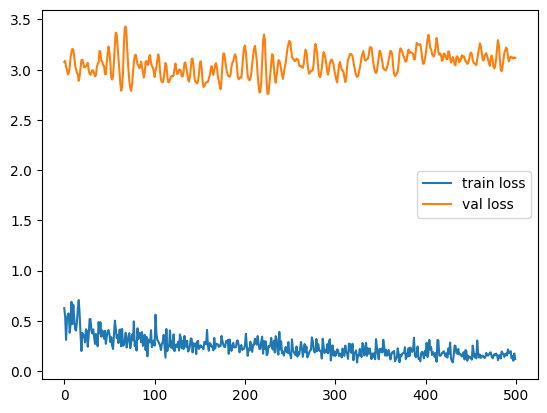

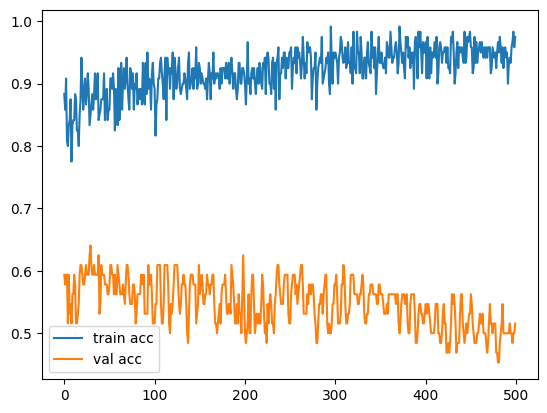

<Figure size 640x480 with 0 Axes>

In [235]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [176]:
from keras.preprocessing import image

In [177]:
from tensorflow.keras.utils import load_img

In [220]:
img_path = '/content/drive/MyDrive/skin_disease/train/allergies/Screen Shot 2023-05-05 at 2.22.31 PM.png'
img = load_img(img_path, target_size=(224, 224))


In [221]:
test_image = img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)

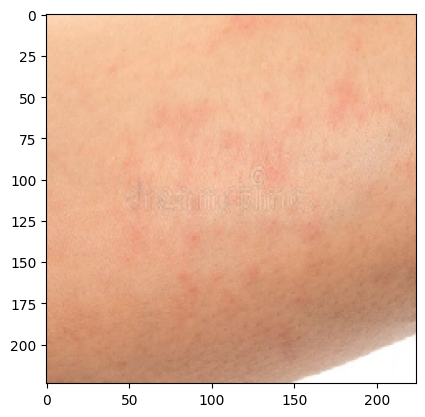

In [222]:
plt.imshow(img_to_array(img)/255)

In [179]:
model.predict(test_image)

1/1 [==============================] - 0s 221ms/step


array([[0., 0., 1., 0., 0.]], dtype=float32)

In [180]:
pred_skin= model.predict(test_image)

1/1 [==============================] - 0s 40ms/step


In [181]:
pred_skin.shape

(1, 5)

In [182]:
np.argmax(pred_skin)


2

In [183]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [87]:
class_names

['allergies', 'bug_bite', 'eczema', 'normal', 'white_spots']

In [88]:
class_names[np.argmax(pred_skin)]

'normal'

In [269]:
path_skin ="/content/drive/MyDrive/skin_disease/train/bug bite/Screen Shot 2023-05-05 at 4.20.02 PM.png"

In [270]:
img_path = path_skin
img = load_img(img_path, target_size=(224, 224))
test_image = img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)


In [271]:
pred_skin= model.predict(test_image)

1/1 [==============================] - 0s 21ms/step


In [272]:
class_names

['allergies', 'bug_bite', 'eczema', 'normal', 'white_spots']

PREDICTED 1


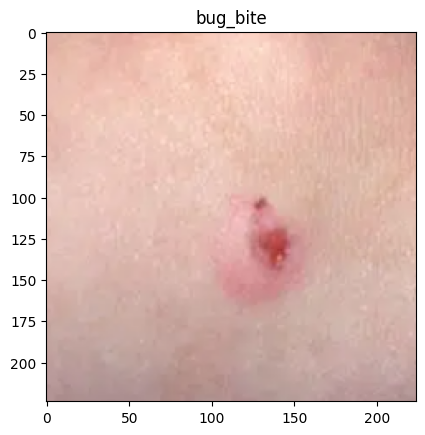

In [273]:
plt.imshow(img_to_array(img)/255)
plt.title(class_names[np.argmax(pred_skin)])
print("PREDICTED", np.argmax(pred_skin))
plt.show()

In [300]:
test_paths =[
 "/content/drive/MyDrive/skin_disease/train/allergies/Screen Shot 2023-05-05 at 2.22.31 PM.png"  ,
 "/content/drive/MyDrive/skin_disease/train/bug bite/Screen Shot 2023-05-05 at 2.26.01 PM.png",
 "/content/drive/MyDrive/skin_disease/train/eczema/Screen Shot 2023-05-05 at 4.11.30 PM.png",
 "/content/drive/MyDrive/skin_disease/train/allergies/Screen Shot 2023-05-05 at 4.16.13 PM.png",
 "/content/drive/MyDrive/skin_disease/train/eczema/Screen Shot 2023-05-05 at 4.13.24 PM.png",
 "/content/drive/MyDrive/skin_disease/train/normal/Screen Shot 2023-05-05 at 2.31.15 PM.png",
"/content/drive/MyDrive/skin_disease/train/bug bite/Screen Shot 2023-05-05 at 4.21.58 PM.png",
 "/content/drive/MyDrive/skin_disease/train/allergies/Screen Shot 2023-05-05 at 2.23.22 PM.png",
 "/content/drive/MyDrive/skin_disease/train/allergies/Screen Shot 2023-05-05 at 4.17.25 PM.png",
 "/content/drive/MyDrive/skin_disease/train/bug bite/Screen Shot 2023-05-05 at 4.21.12 PM.png",
 "/content/drive/MyDrive/skin_disease/train/eczema/Screen Shot 2023-05-05 at 2.15.45 PM.png",
 "/content/drive/MyDrive/skin_disease/train/normal/Screen Shot 2023-05-05 at 2.31.29 PM.png",
 "/content/drive/MyDrive/skin_disease/train/normal/Screen Shot 2023-05-05 at 2.31.03 PM.png",
 "/content/drive/MyDrive/skin_disease/train/white spots/Screen Shot 2023-05-05 at 4.25.52 PM.png",
 "/content/drive/MyDrive/skin_disease/train/bug bite/Screen Shot 2023-05-05 at 4.21.06 PM.png",
 "/content/drive/MyDrive/skin_disease/train/bug bite/Screen Shot 2023-05-05 at 4.21.42 PM.png",
 "/content/drive/MyDrive/skin_disease/train/eczema/Screen Shot 2023-05-05 at 4.11.30 PM.png",
 "/content/drive/MyDrive/skin_disease/train/eczema/Screen Shot 2023-05-05 at 4.13.17 PM.png",
 

]

In [301]:
len(test_paths)/6

3.0

In [285]:
  def get_pred(path):
    img = load_img(img_path, target_size=(224, 224))
    test_image = img_to_array(img)
    test_image = np.expand_dims(test_image, axis = 0)
    pred_skin= model.predict(test_image)
    return pred_skin, img


1/1 [==============================] - 0s 21ms/step


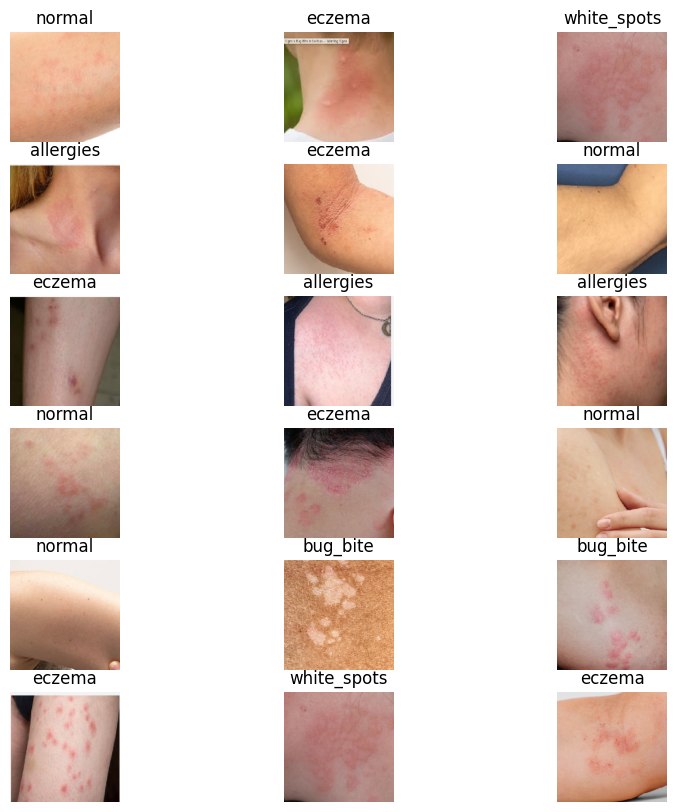

In [303]:
plt.figure(figsize=(10,10))
for i in range(len(test_paths)):
    ax = plt.subplot(6, 3, i + 1)
    img_path = test_paths[i]
    diag, img =get_pred(img_path)
    ax.set_title(class_names[np.argmax(diag)])
    plt.imshow(img)
    plt.axis("off")
     

In [304]:
from tensorflow.keras.optimizers import SGD

In [323]:
model_finetune=model

In [314]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_5
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 dense


In [324]:
for layer in model_finetune.layers[:16]:
   layer.trainable = False
for layer in model_finetune.layers[16:]:
   layer.trainable = True

In [325]:
model_finetune.compile(optimizer=SGD(learning_rate=0.0003, momentum=0.9), loss='categorical_crossentropy',
                       metrics=["accuracy"]
                       )



In [327]:
# we train our model again (this time fine-tuning the top 2 inception blocks
r_fine_tune = model_finetune.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=200,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-327-03522632d6ae>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r_fine_tune = model_finetune.fit_generator(


Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.1286 - accuracy: 0.9500 - val_loss: 3.2695 - val_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 3s 3s/step - loss: 0.1224 - accuracy: 0.9500 - val_loss: 3.2822 - val_accuracy: 0.5625
Epoch 3/200
1/1 [==============================] - 4s 4s/step - loss: 0.1411 - accuracy: 0.9250 - val_loss: 3.4390 - val_accuracy: 0.5156
Epoch 4/200
1/1 [==============================] - 4s 4s/step - loss: 0.1211 - accuracy: 0.9583 - val_loss: 3.5524 - val_accuracy: 0.4531
Epoch 5/200
1/1 [==============================] - 3s 3s/step - loss: 0.1249 - accuracy: 0.9667 - val_loss: 3.5400 - val_accuracy: 0.4375
Epoch 6/200
1/1 [==============================] - 3s 3s/step - loss: 0.1888 - accuracy: 0.9417 - val_loss: 3.4586 - val_accuracy: 0.5469
Epoch 7/200
1/1 [==============================] - 4s 4s/step - loss: 0.1775 - accuracy: 0.9500 - val_loss: 3.3614 - val_accuracy: 0.5156
Epoch 8/200
1/1 [=================

In [328]:
 def get_pred2(path):
    img = load_img(img_path, target_size=(224, 224))
    test_image = img_to_array(img)
    test_image = np.expand_dims(test_image, axis = 0)
    pred_skin=model_finetune.predict(test_image)
    return pred_skin, img

1/1 [==============================] - 0s 39ms/step


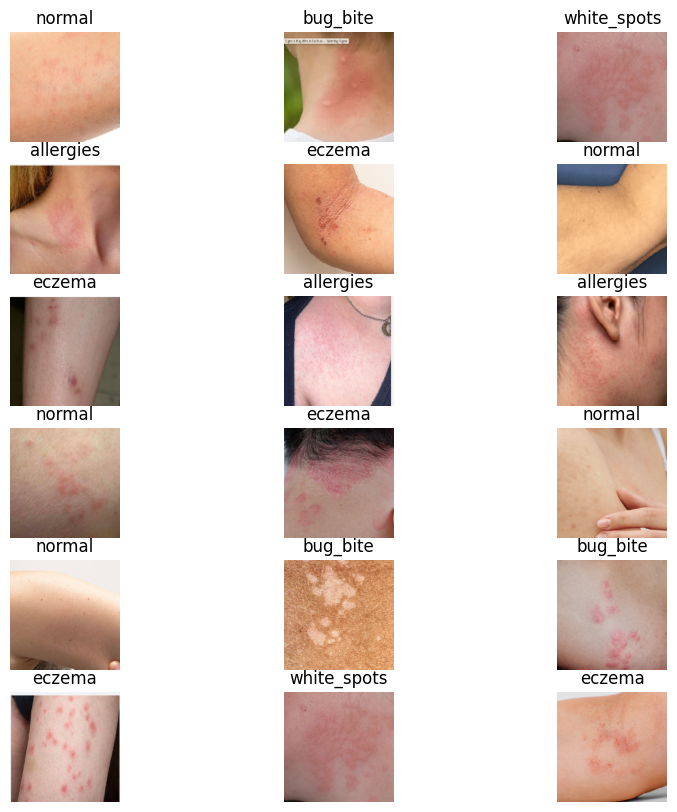

In [329]:
plt.figure(figsize=(10,10))
for i in range(len(test_paths)):
    ax = plt.subplot(6, 3, i + 1)
    img_path = test_paths[i]
    diag, img =get_pred2(img_path)
    ax.set_title(class_names[np.argmax(diag)])
    plt.imshow(img)
    plt.axis("off")